<a href="https://colab.research.google.com/github/vickypedia-12/CRM/blob/main/California_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [144]:
#All Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import skew
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [44]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/housing.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
# data = pd.read_csv('housing.csv')

In [46]:
data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

1. **longitude**: A measure of how far west a house is; a higher value is farther west
2. **latitude**: A measure of how far north a house is; a higher value is farther north
3. **housingMedianAge**: Median age of a house within a block; a lower number is a newer building
4. **totalRooms**: Total number of rooms within a block
5. **totalBedrooms**: Total number of bedrooms within a block
6. **population**: Total number of people residing within a block
7. **households**: Total number of households, a group of people residing within a home unit, for a block
8. **medianIncome**: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. **medianHouseValue**: Median house value for households within a block (measured in US Dollars)
10. **oceanProximity**: Location of the house w.r.t ocean/sea

In [47]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [48]:
data.describe()


longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [49]:
null_counts = data.isnull().sum()
null_counts

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [50]:
# null_rows = data[data.isnull().any(axis=1)]
null_row = data[data['total_bedrooms'].isnull()]
print(null_row)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
290      -122.16     37.77                47.0       1256.0             NaN   
341      -122.17     37.75                38.0        992.0             NaN   
538      -122.28     37.78                29.0       5154.0             NaN   
563      -122.24     37.75                45.0        891.0             NaN   
696      -122.10     37.69                41.0        746.0             NaN   
...          ...       ...                 ...          ...             ...   
20267    -119.19     34.20                18.0       3620.0             NaN   
20268    -119.18     34.19                19.0       2393.0             NaN   
20372    -118.88     34.17                15.0       4260.0             NaN   
20460    -118.75     34.29                17.0       5512.0             NaN   
20484    -118.72     34.28                17.0       3051.0             NaN   

       population  households  median_income  media

In [51]:
data.shape

(20640, 10)

In [52]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [53]:
#Here,  i have tried to fillna values using grouping technique,
# where the groups such as houses in same latitude and longitude will have same total__bedrooms
# another is groups with same total rooms will have same total_bedrroms
# another is groups with same hosuehold will have same total_bedrooms
# by doing this we have removed all the null values in total_bedrooms and brought it from 207 to 0
data['total_bedrooms'] = data.groupby(['latitude','longitude'])['total_bedrooms'].transform(lambda x:x.fillna(x.mean()))

In [54]:
data['total_bedrooms'] = data.groupby(['total_rooms'])['total_bedrooms'].transform(lambda x:x.fillna(x.mean()))

In [55]:
data['total_bedrooms'] = data.groupby(['households'])['total_bedrooms'].transform(lambda x:x.fillna(x.mean()))

In [56]:
null_counts = data.isnull().sum()
null_counts

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [57]:
null_row = data[data['total_bedrooms'].isnull()]
print(null_row)

Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity]
Index: []


In [58]:
data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [59]:
data.tail()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND

In [60]:
data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

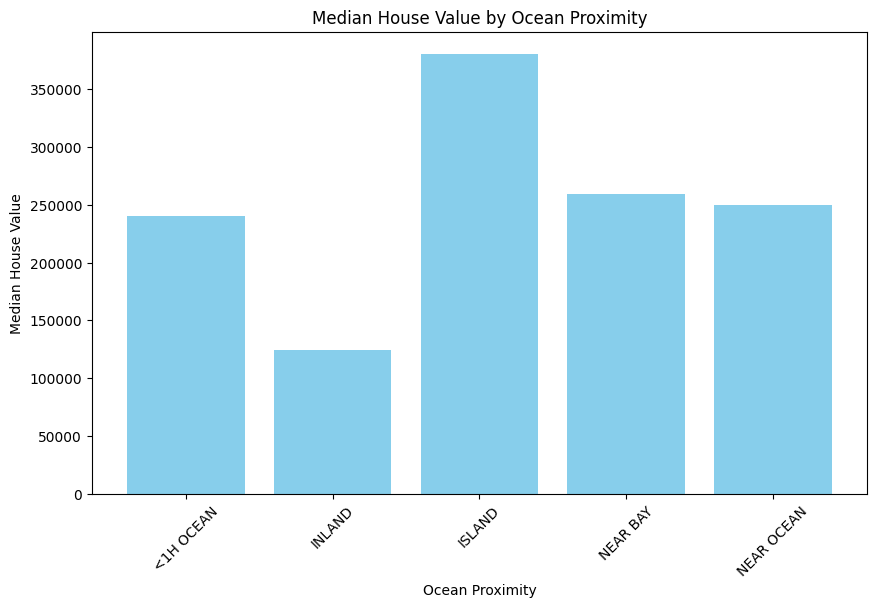

In [61]:
grouped_data = data.groupby('ocean_proximity')['median_house_value'].mean().reset_index()

# Plot the graph
plt.figure(figsize=(10, 6))
plt.bar(grouped_data['ocean_proximity'], grouped_data['median_house_value'], color='skyblue')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.title('Median House Value by Ocean Proximity')
plt.xticks(rotation=45)
plt.show()

In [62]:
data['ocean_proximity'] = data['ocean_proximity'].replace({'<1H OCEAN': 'NEAR BAY', 'NEAR OCEAN': 'NEAR BAY'})
print(data['ocean_proximity'].value_counts())

ocean_proximity
NEAR BAY    14084
INLAND       6551
ISLAND          5
Name: count, dtype: int64


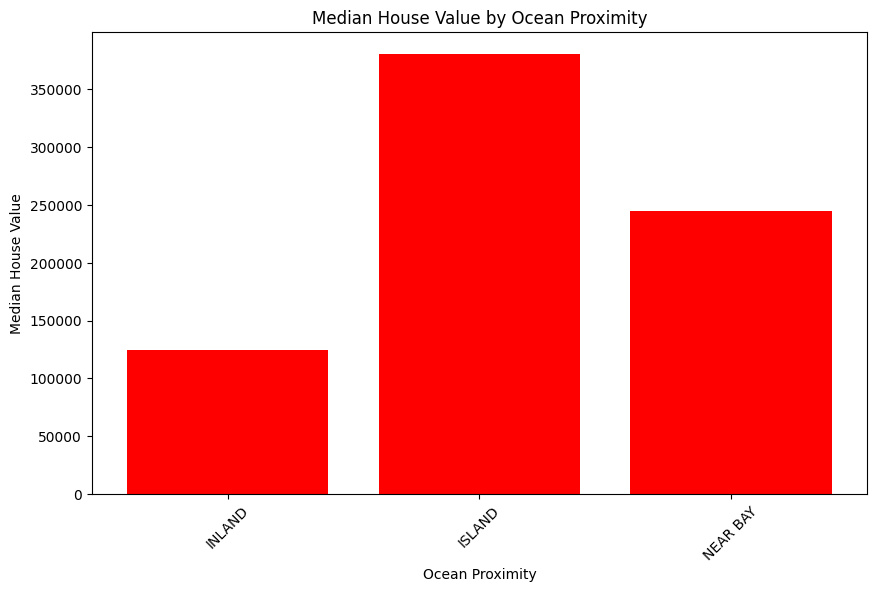

In [63]:
grouped_data = data.groupby('ocean_proximity')['median_house_value'].mean().reset_index()

# Plot the graph
plt.figure(figsize=(10, 6))
plt.bar(grouped_data['ocean_proximity'], grouped_data['median_house_value'], color='red')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.title('Median House Value by Ocean Proximity')
plt.xticks(rotation=45)
plt.show()

In [64]:
encoding_map = {'INLAND': 0, 'ISLAND': 1, 'NEAR BAY': 0.5}
data['ocean_proximity_encoded'] = data['ocean_proximity'].map(encoding_map)
print(data[['ocean_proximity', 'ocean_proximity_encoded']].head())
print(data[['ocean_proximity', 'ocean_proximity_encoded']].tail())


  ocean_proximity  ocean_proximity_encoded
0        NEAR BAY                      0.5
1        NEAR BAY                      0.5
2        NEAR BAY                      0.5
3        NEAR BAY                      0.5
4        NEAR BAY                      0.5
      ocean_proximity  ocean_proximity_encoded
20635          INLAND                      0.0
20636          INLAND                      0.0
20637          INLAND                      0.0
20638          INLAND                      0.0
20639          INLAND                      0.0


In [65]:
column_to_check = 'ocean_proximity_encoded'
negative_values = data[data[column_to_check] < 0]

# Print the rows with negative values
if not negative_values.empty:
    print(f"Rows with negative values in '{column_to_check}':")
    print(negative_values)
else:
    print(f"No negative values found in '{column_to_check}'.")

No negative values found in 'ocean_proximity_encoded'.


In [66]:
print(data['ocean_proximity_encoded'].value_counts())

ocean_proximity_encoded
0.5    14084
0.0     6551
1.0        5
Name: count, dtype: int64


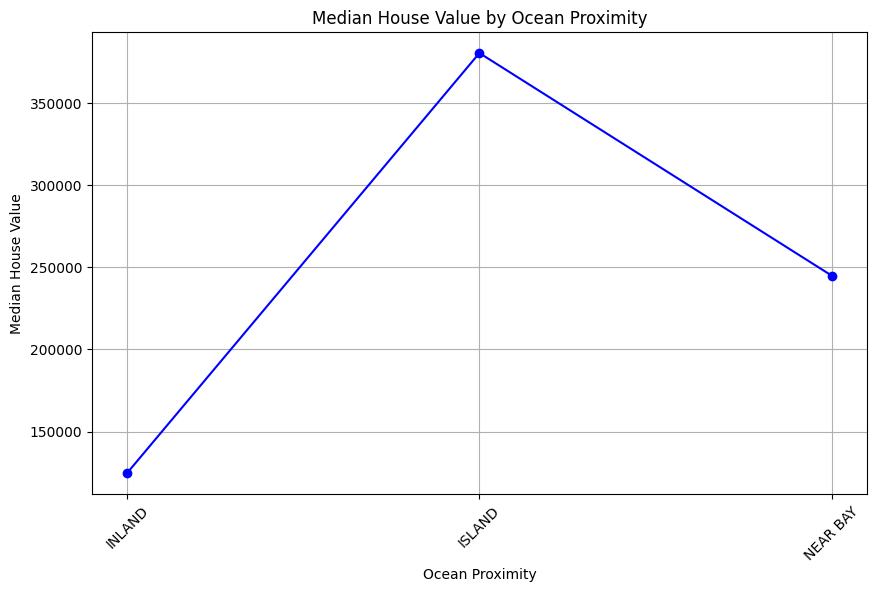

In [67]:
grouped_data = data.groupby('ocean_proximity')['median_house_value'].mean().reset_index()

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(grouped_data['ocean_proximity'], grouped_data['median_house_value'], marker='o', linestyle='-', color='b')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.title('Median House Value by Ocean Proximity')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

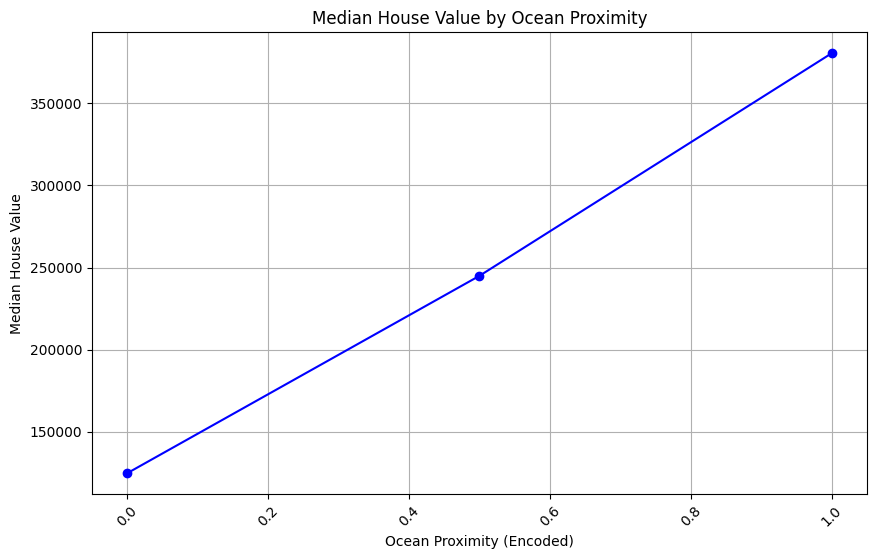

In [68]:
grouped_data = data.groupby('ocean_proximity_encoded')['median_house_value'].mean().reset_index()

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(grouped_data['ocean_proximity_encoded'], grouped_data['median_house_value'], marker='o', linestyle='-', color='b')
plt.xlabel('Ocean Proximity (Encoded)')
plt.ylabel('Median House Value')
plt.title('Median House Value by Ocean Proximity')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [69]:
data = data.drop(columns = ['ocean_proximity'])
print(data.head())
print(data.tail())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  \
0       322.0       126.0         8.3252            452600.0   
1      2401.0      1138.0         8.3014            358500.0   
2       496.0       177.0         7.2574            352100.0   
3       558.0       219.0         5.6431            341300.0   
4       565.0       259.0         3.8462            342200.0   

   ocean_proximity_encoded  
0                      0.5  
1                      0.5  
2                      0.5  
3                      0.5  
4                  

In [70]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_encoded'],
      dtype='object')

In [71]:
data = data.rename(columns={'ocean_proximity_encoded': 'ocean_proximity'})
print(data.head())
print(data.tail())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  ocean_proximity  
0       322.0       126.0         8.3252            452600.0              0.5  
1      2401.0      1138.0         8.3014            358500.0              0.5  
2       496.0       177.0         7.2574            352100.0              0.5  
3       558.0       219.0         5.6431            341300.0              0.5  
4       565.0       259.0         3.8462            342200.0              0.5  
       longitude  latitude  housing_median_age  total_rooms  total_be

In [72]:
data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  ocean_proximity  
0       322.0       126.0         8.3252            452600.0              0.5  
1      2401.0      1138.0         8.3014            358500.0              0.5  
2       496.0       177.0         7.2574            352100.0              0.5  
3       558.0       219.0         5.6431            341300.0              0.5  
4       565.0       259.0         3.8462            342200.0              0.5

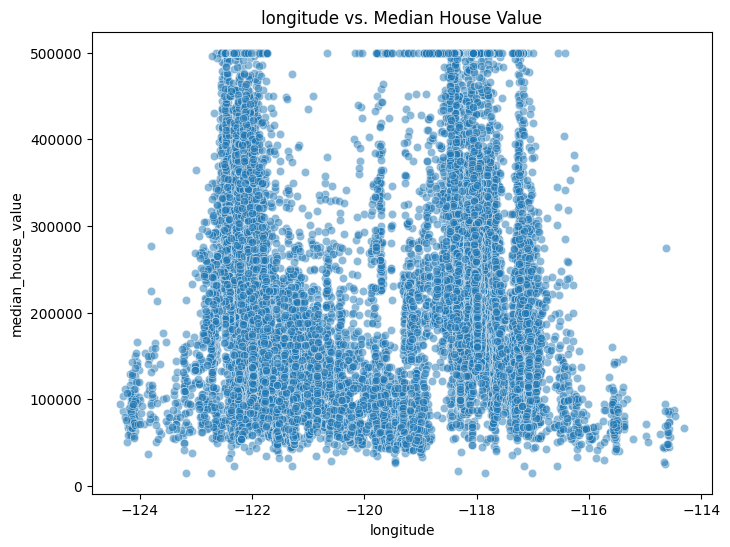

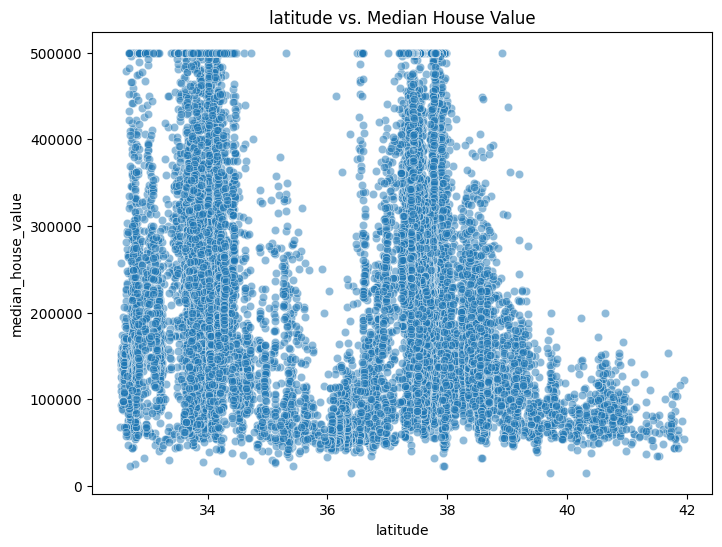

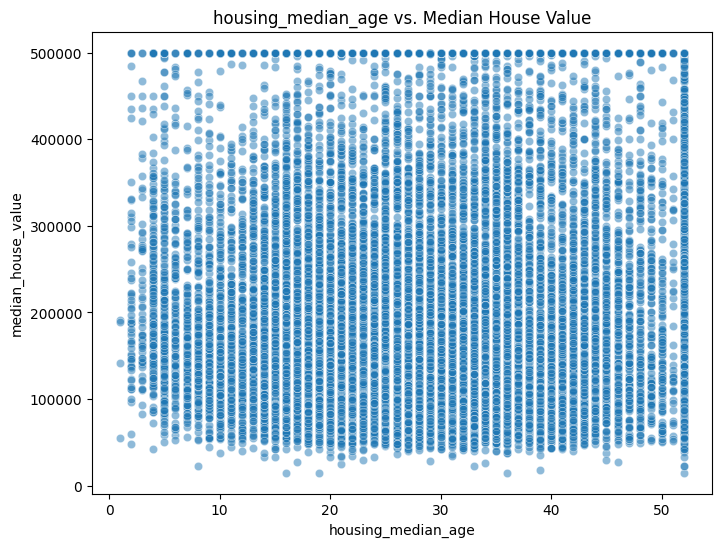

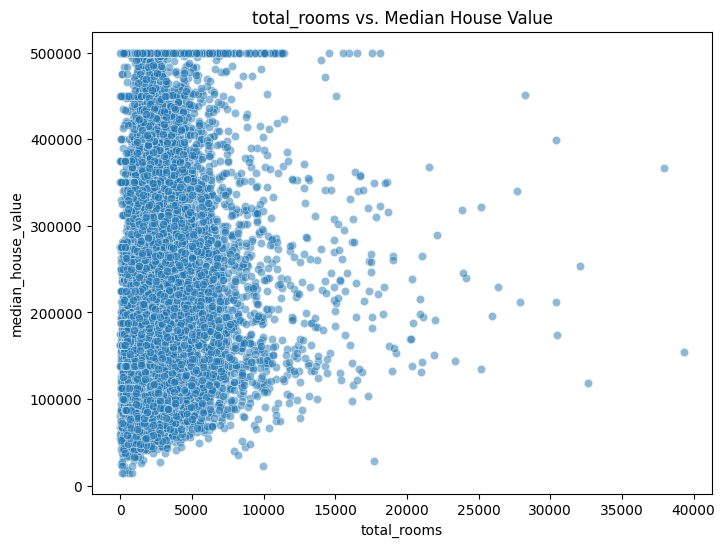

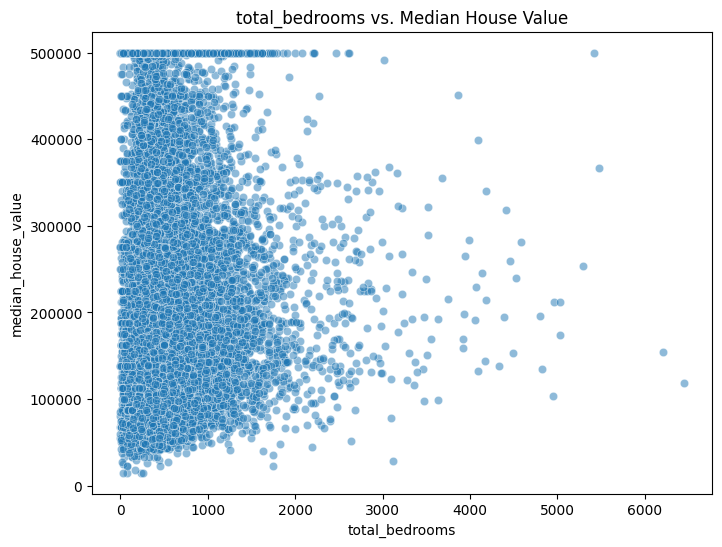

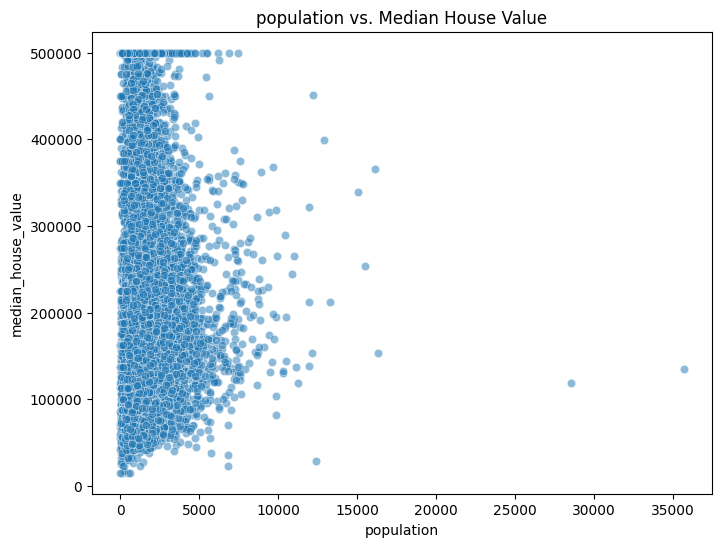

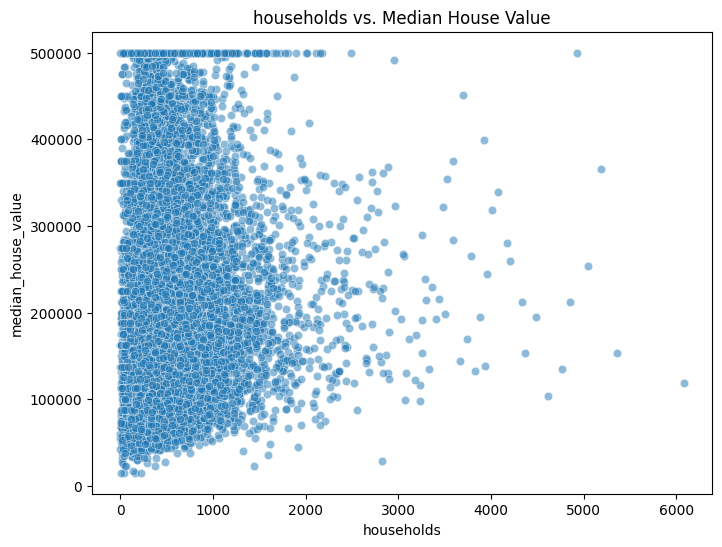

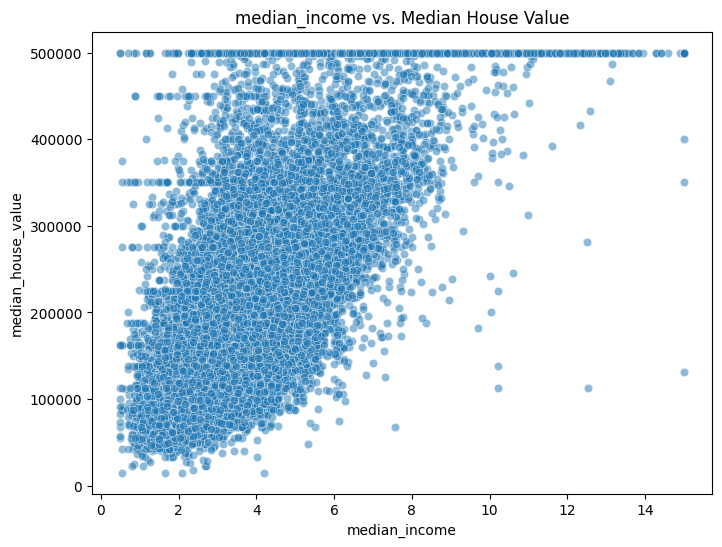

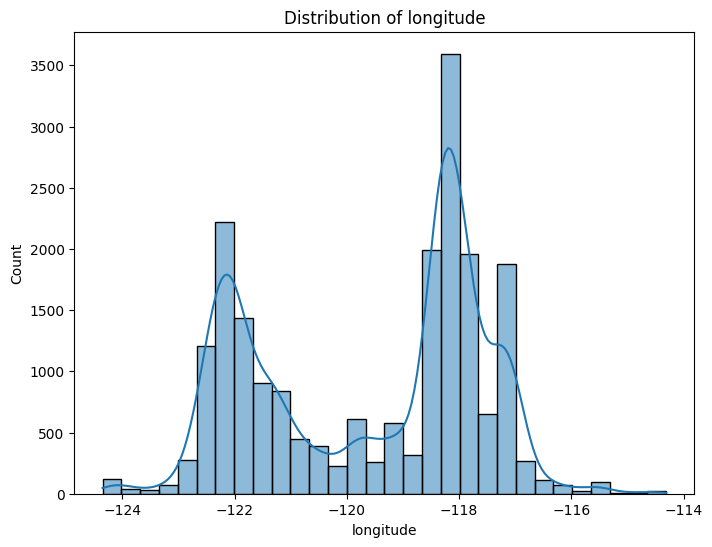

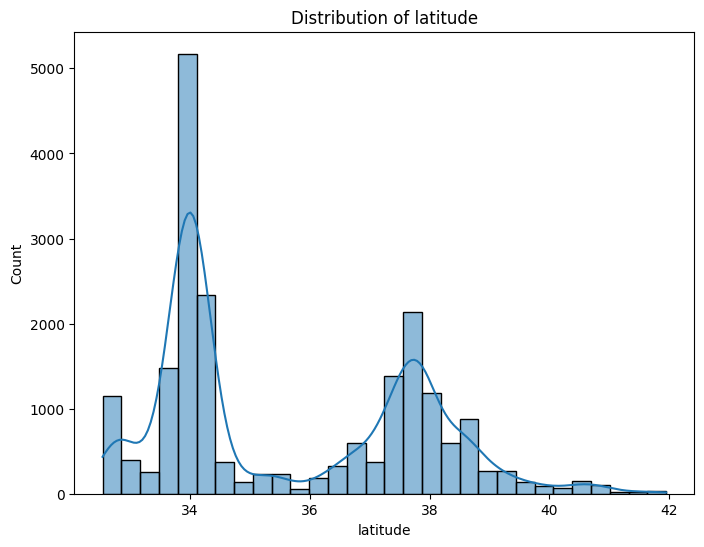

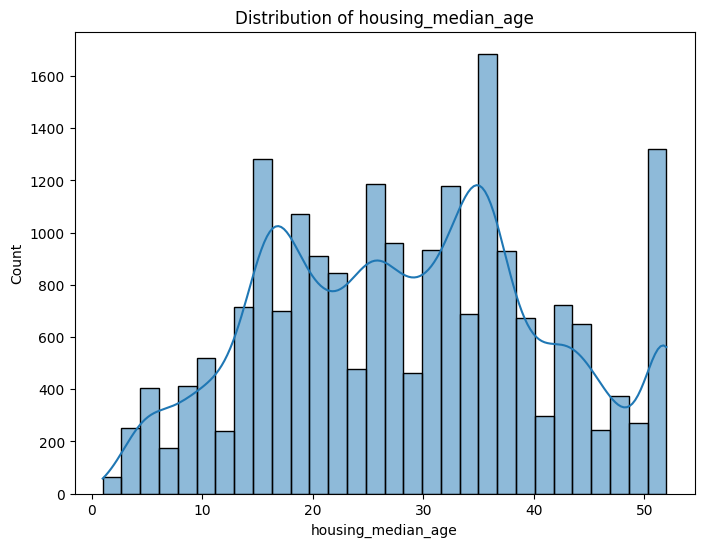

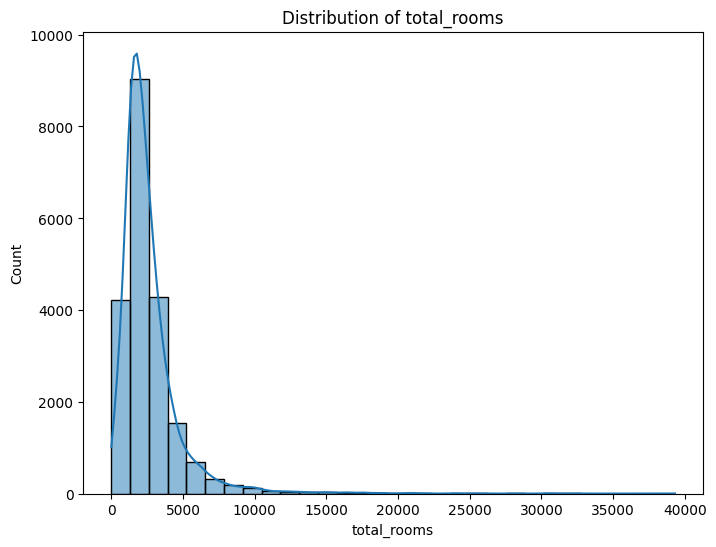

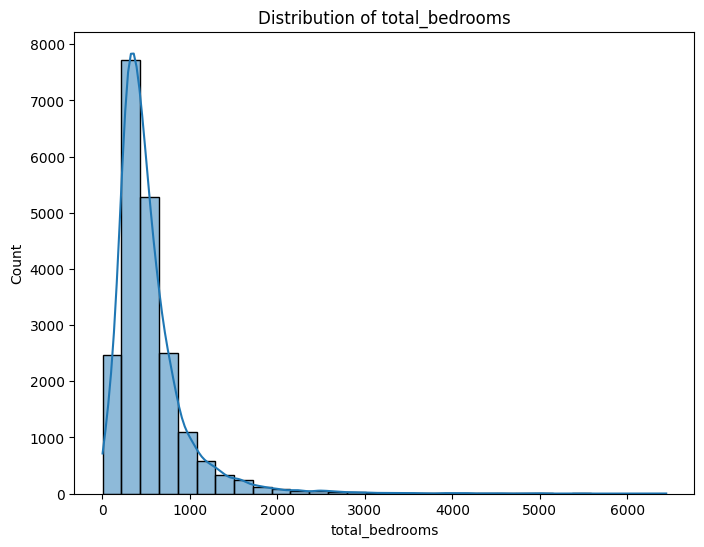

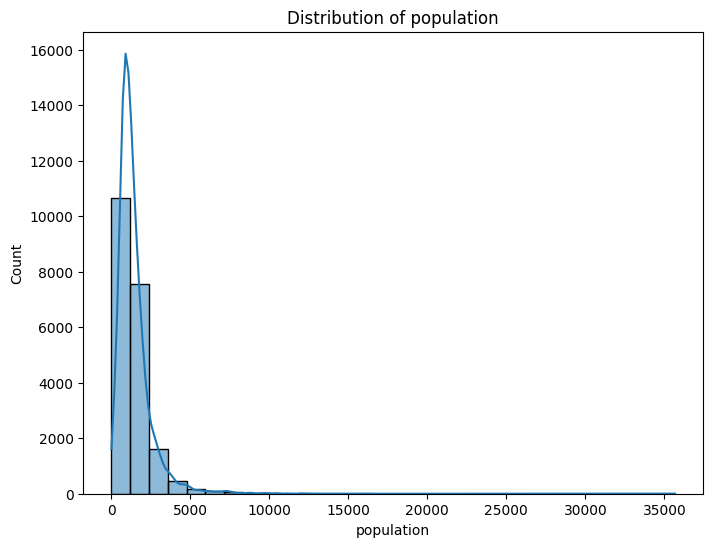

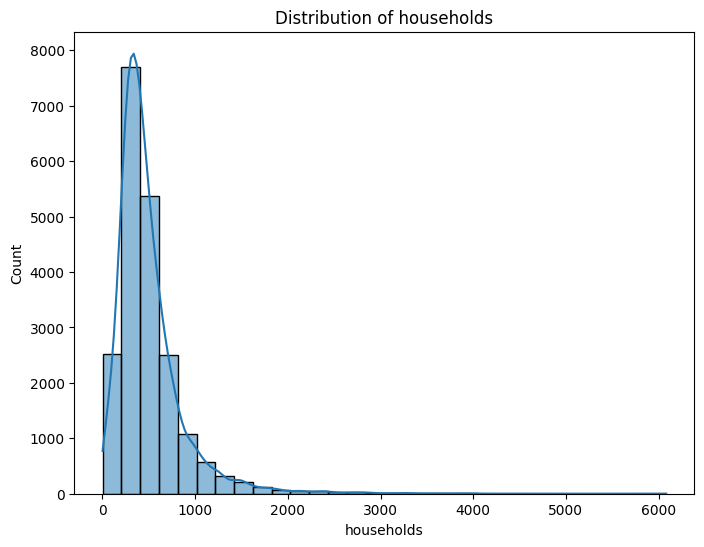

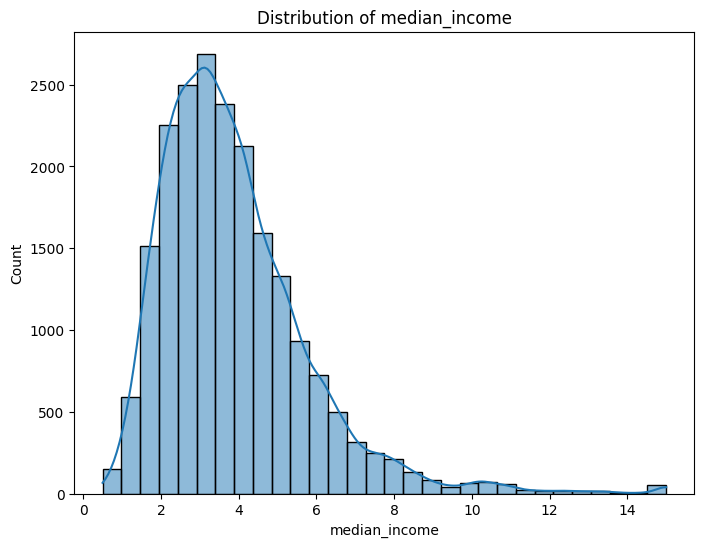

In [73]:
features = [
    'longitude', 'latitude', 'housing_median_age', 'total_rooms',
    'total_bedrooms', 'population', 'households', 'median_income'
]
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x=feature, y='median_house_value', alpha=0.5)
    plt.title(f'{feature} vs. Median House Value')
    plt.show()

for feature in features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

In [74]:
# correlation Coefficient
corr_matrix = data.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.688075
ocean_proximity       0.485199
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049898
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

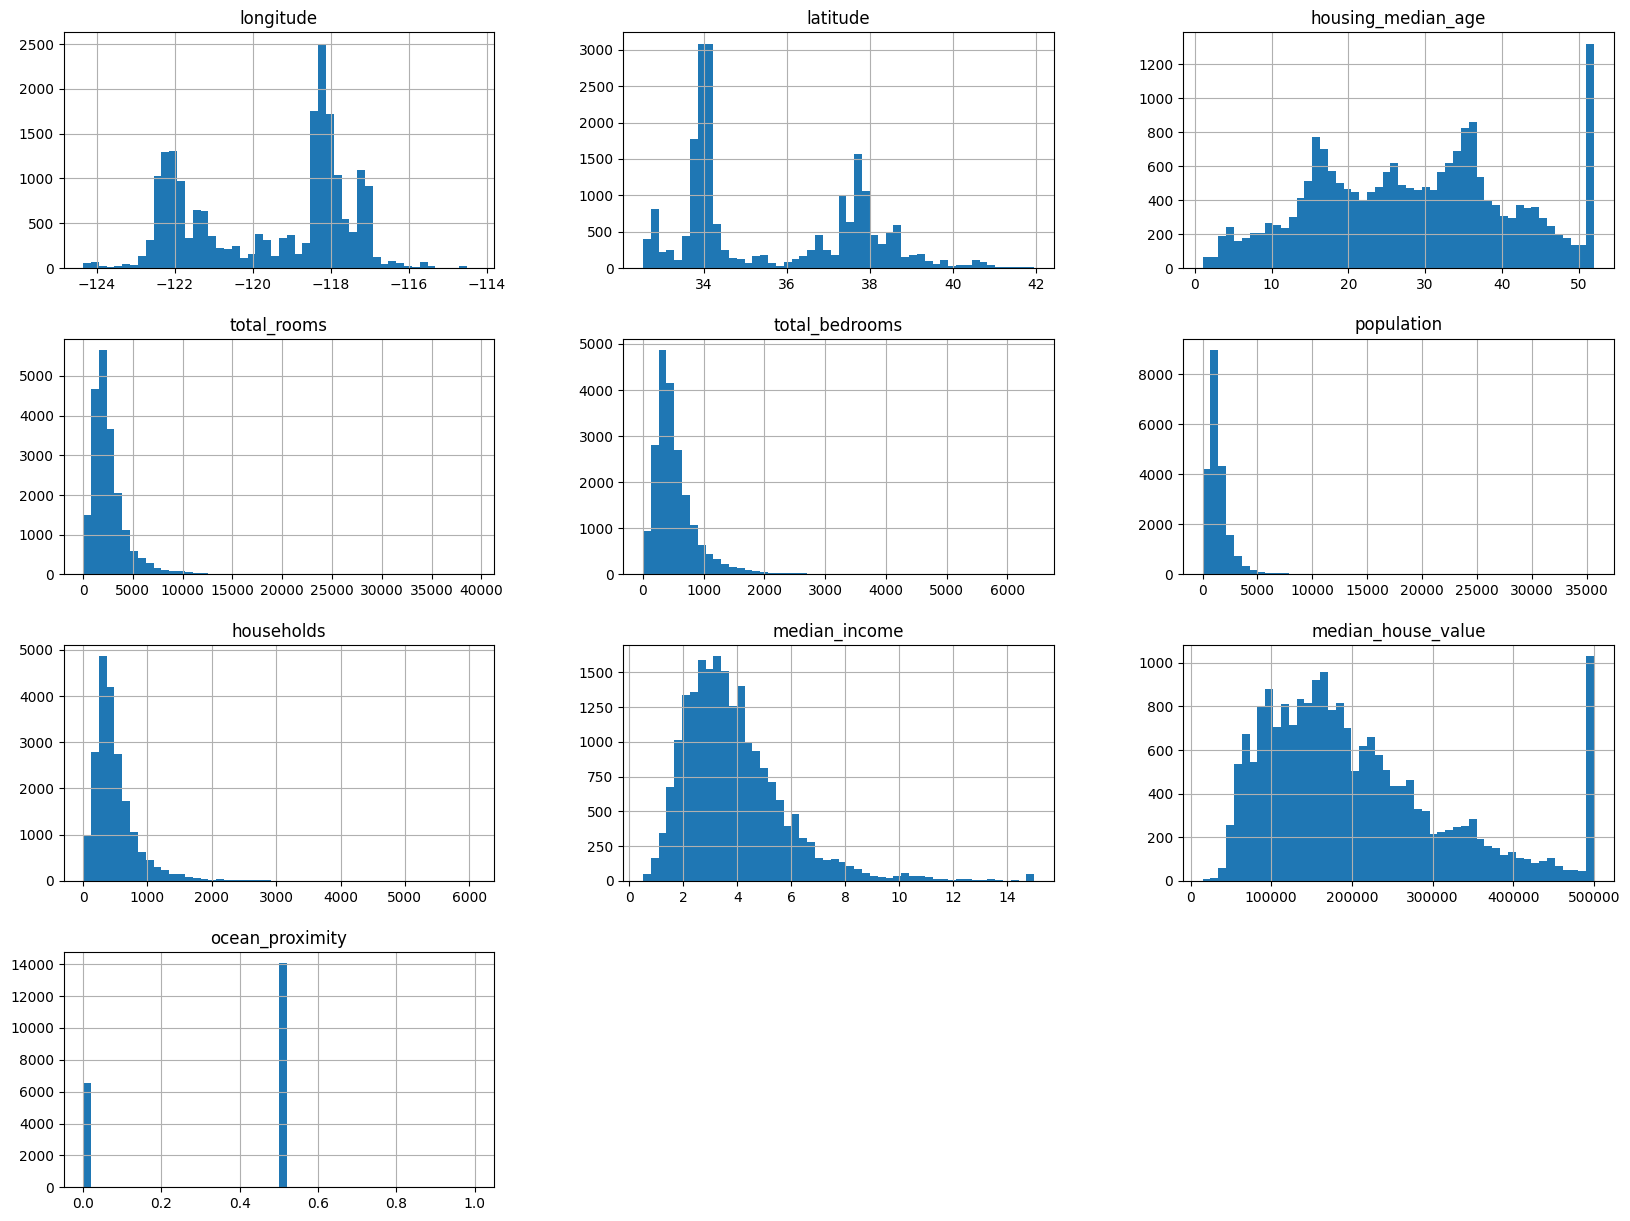

In [75]:
data.hist(bins=50, figsize=(20, 15))
plt.show()

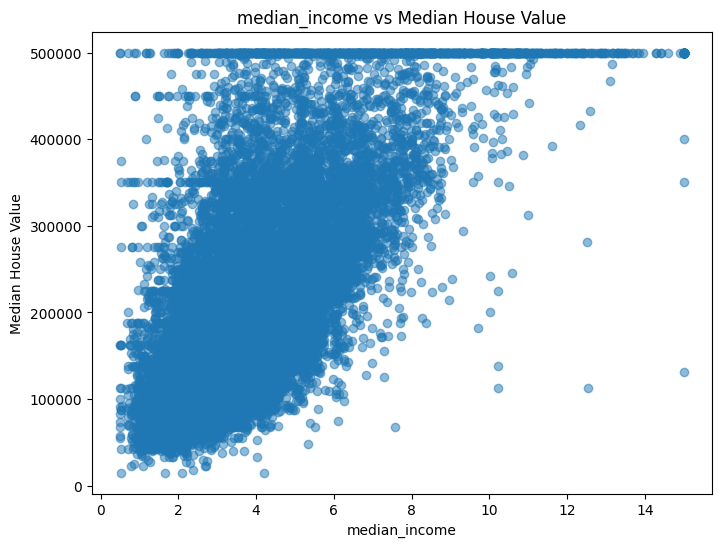

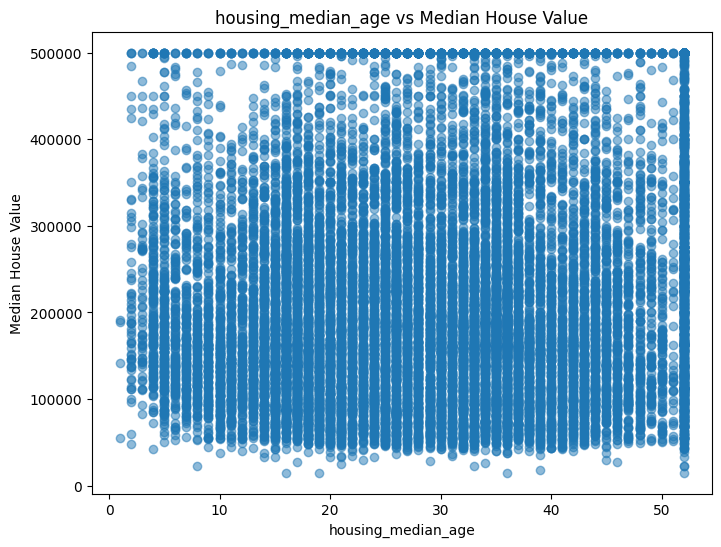

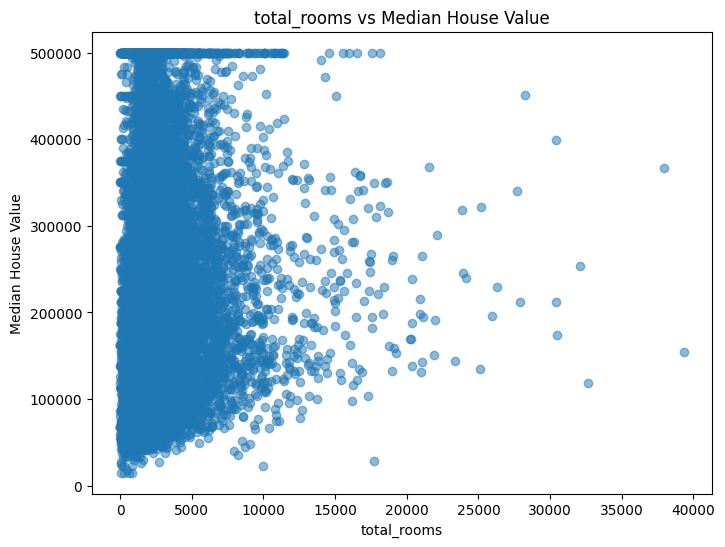

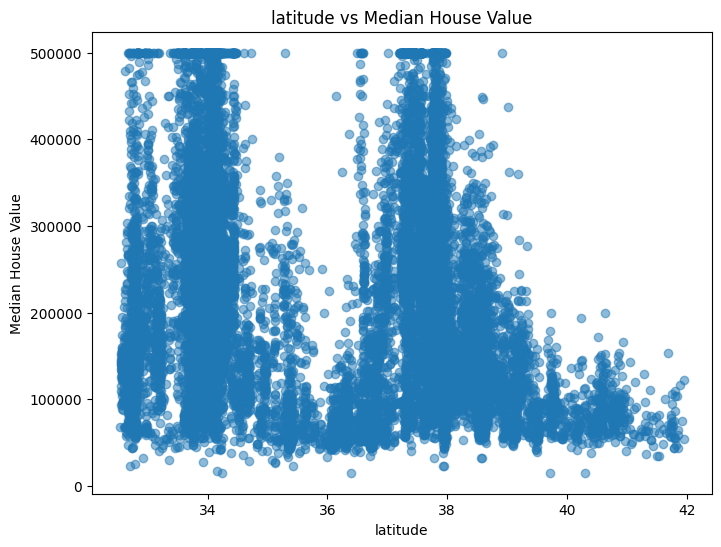

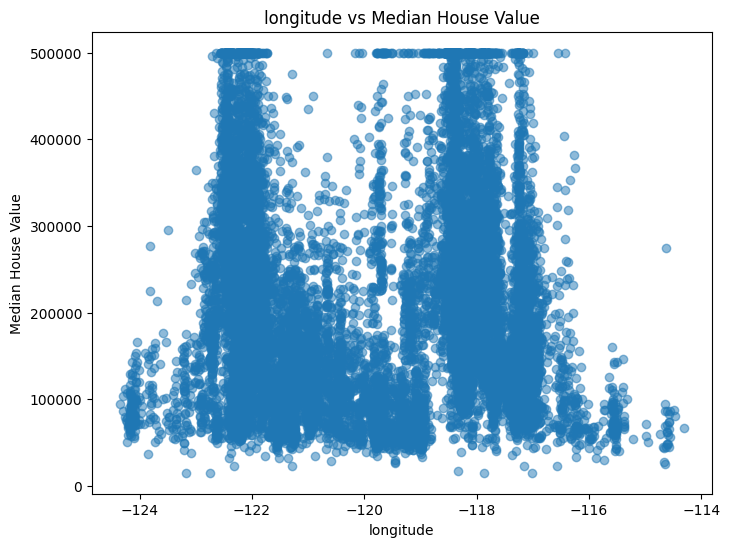

In [76]:
features = ['median_income', 'housing_median_age', 'total_rooms', 'latitude', 'longitude']
for feature in features:
    plt.figure(figsize=(8, 6))
    plt.scatter(data[feature], data['median_house_value'], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('Median House Value')
    plt.title(f'{feature} vs Median House Value')
    plt.show()

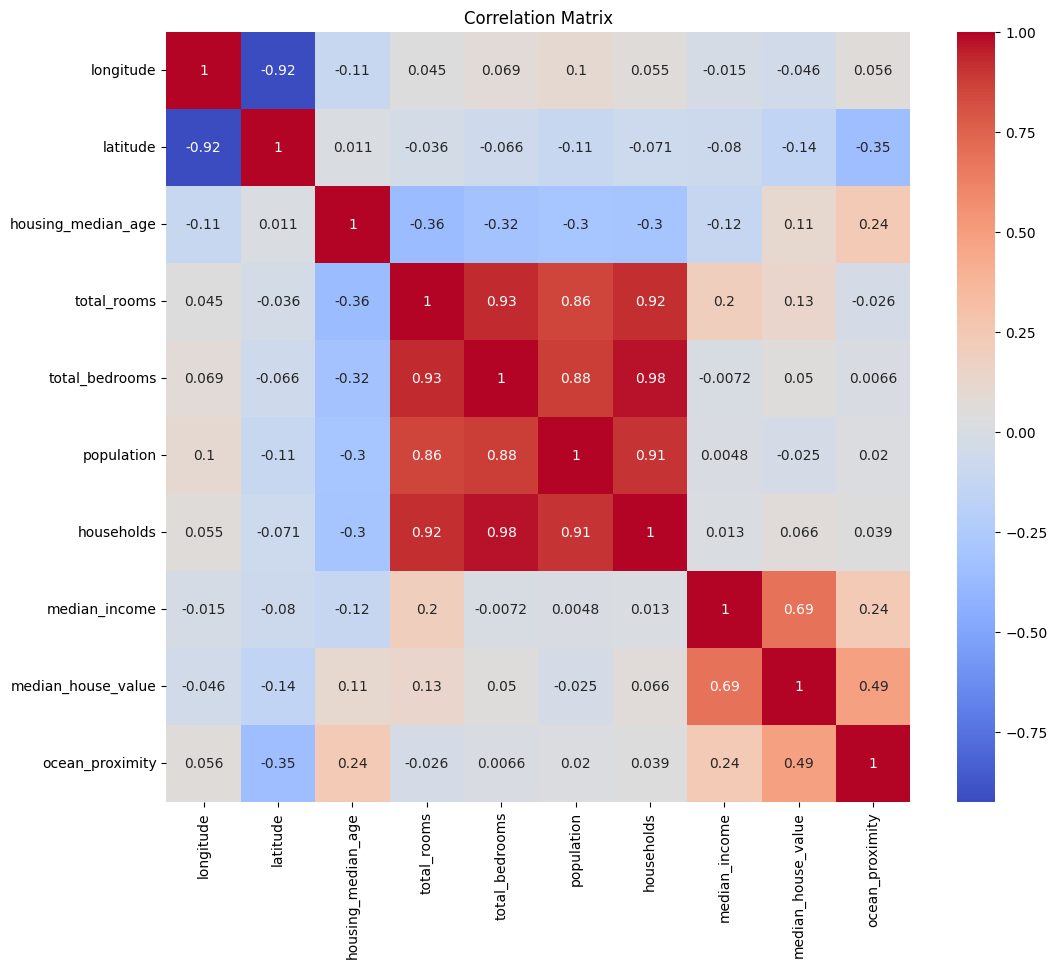

In [77]:
corr_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  float64
dtypes: float64(10)
memory usage: 1.6 MB


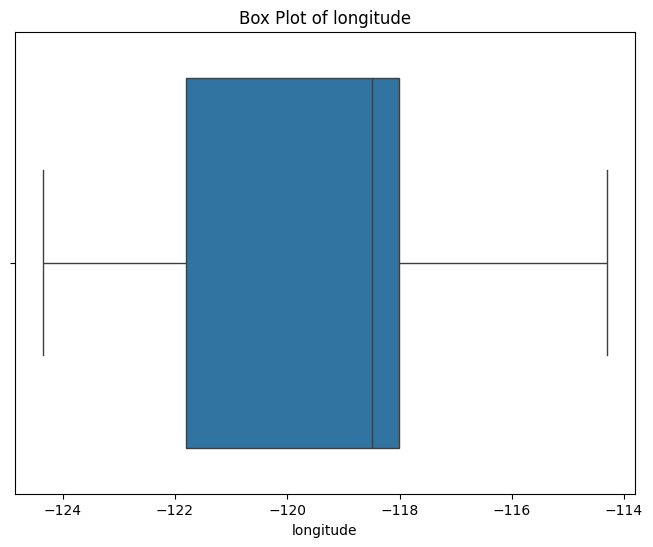

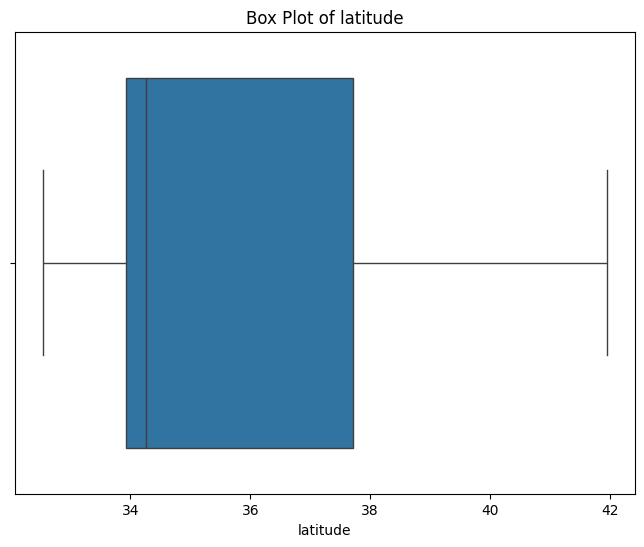

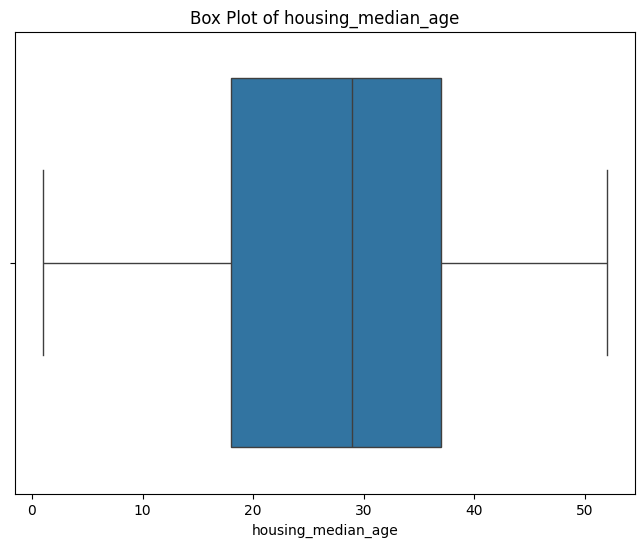

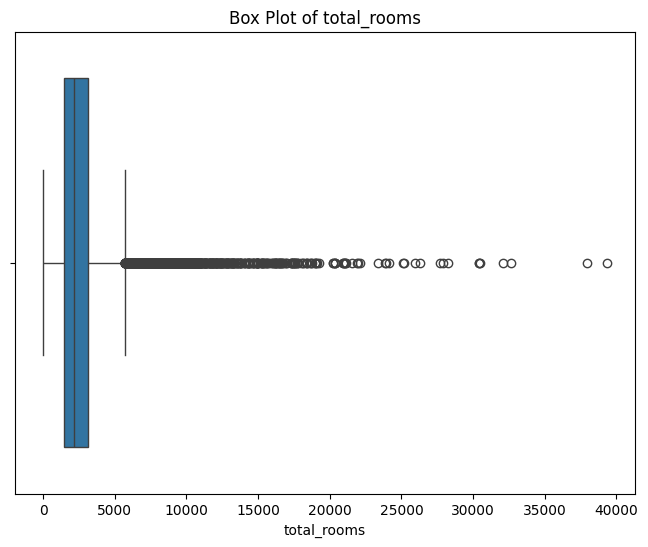

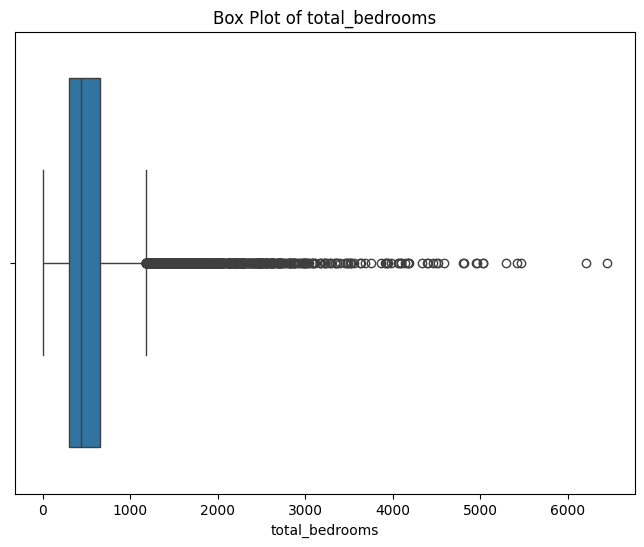

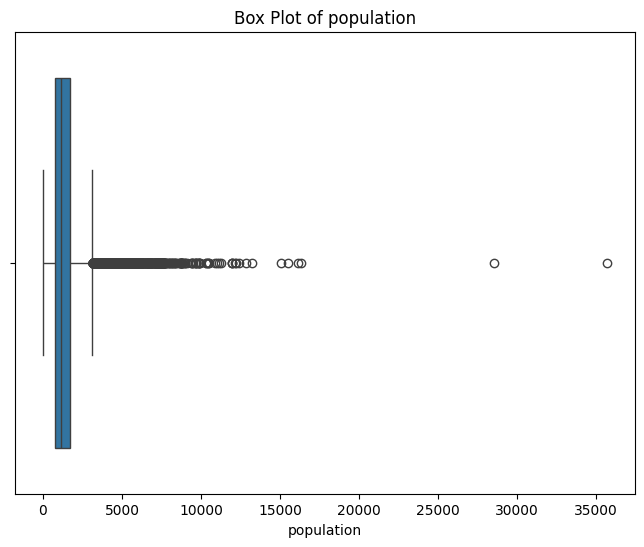

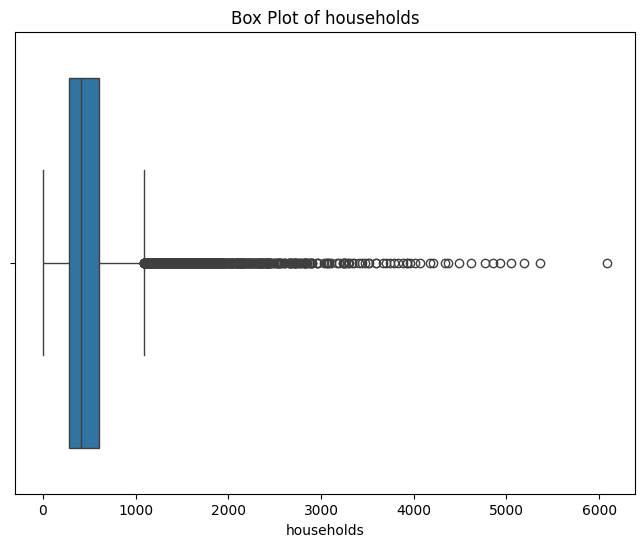

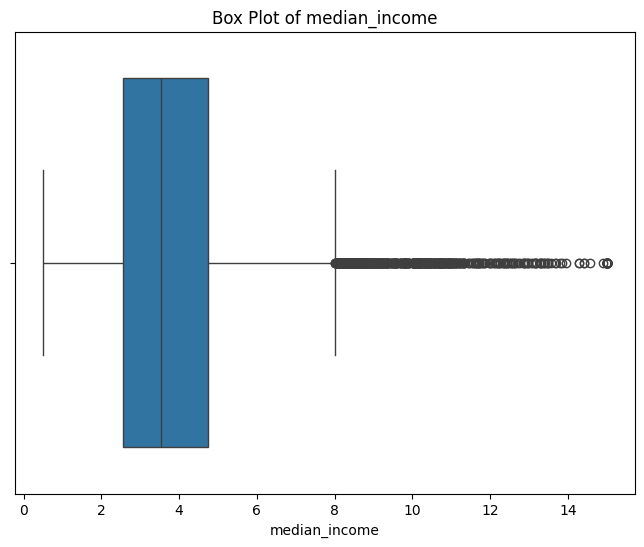

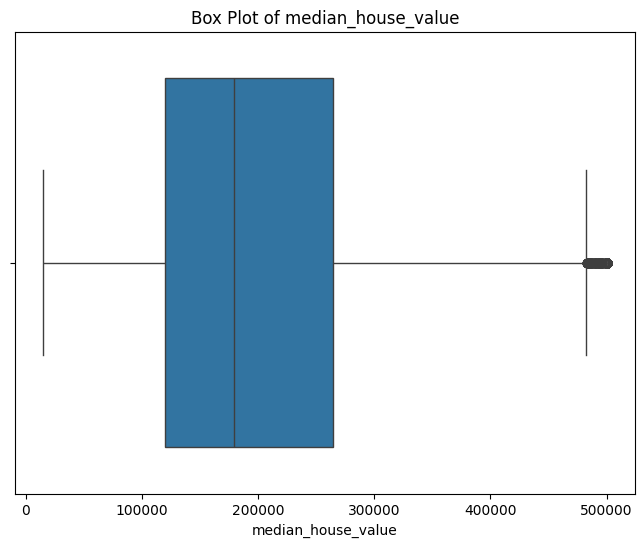

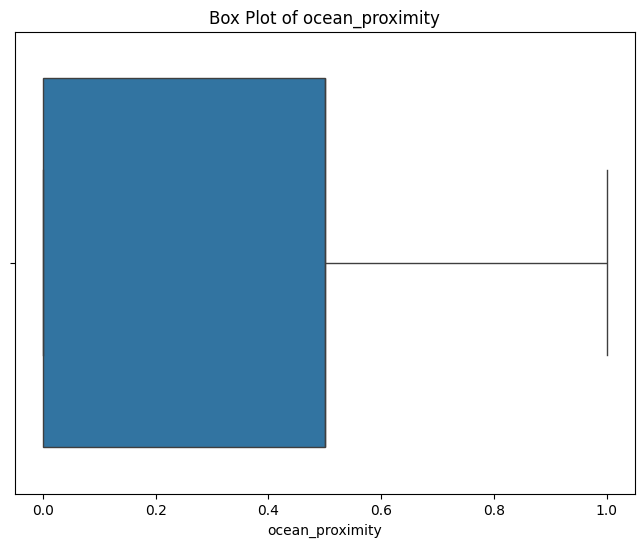

In [79]:
numerical_cols = data.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

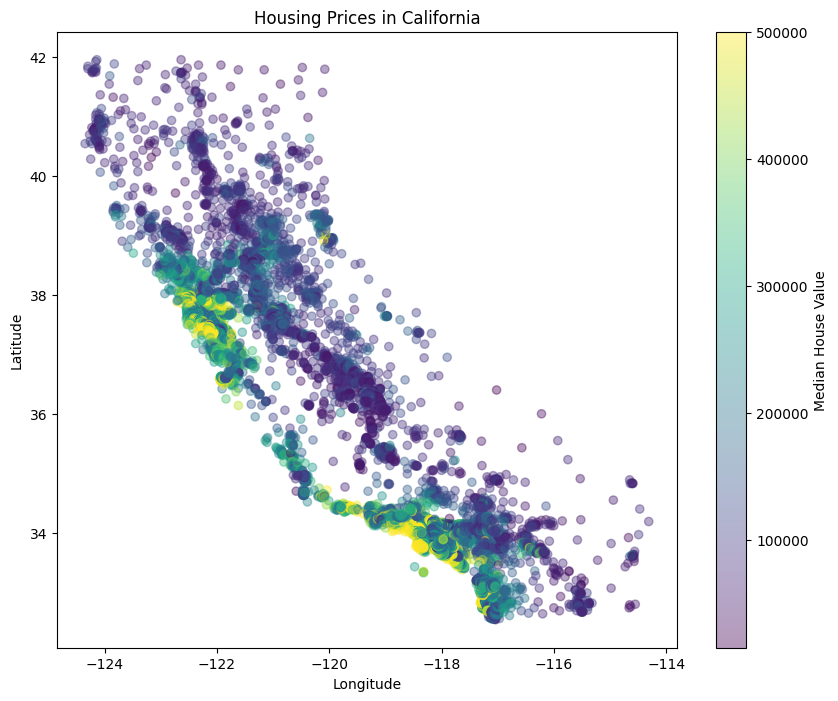

In [80]:
plt.figure(figsize=(10, 8))
plt.scatter(data['longitude'], data['latitude'], alpha=0.4,
            c=data['median_house_value'], cmap='viridis')
plt.colorbar(label='Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Housing Prices in California')
plt.show()

In [81]:
features_to_check = ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
for feature in features_to_check:
    skewness = skew(data[feature])
    print(f'Skewness of {feature}: {skewness}')

Skewness of total_rooms: 4.147042038773343
Skewness of total_bedrooms: 3.453859426242519
Skewness of population: 4.93549950885852
Skewness of households: 3.4101898550856307
Skewness of median_income: 1.64653702990008
Skewness of median_house_value: 0.9776922140978416


In [84]:
X = data.drop('median_house_value', axis=1)  # Features (all columns except 'median_house_value')
y = data['median_house_value']  # Target variable

# Now you can split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  ocean_proximity  
0       322.0       126.0         8.3252            452600.0              0.5  
1      2401.0      1138.0         8.3014            358500.0              0.5  
2       496.0       177.0         7.2574            352100.0              0.5  
3       558.0       219.0         5.6431            341300.0              0.5  
4       565.0       259.0         3.8462            342200.0              0.5

In [88]:
data.tail()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

       ocean_proximity  
20635              0.0  
20636              0.0  
20637              0.0  
20638              0.0  
20639              0.0

In [89]:
# prompt: i want to see the range of values in median_house_value column

print(data['median_house_value'].min(), data['median_house_value'].max())

14999.0 500001.0


In [91]:
features_to_check = ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
for feature in features_to_check:
    skewness = skew(data[feature])
    print(f'Skewness of {feature}: {skewness}')

Skewness of total_rooms: 4.147042038773343
Skewness of total_bedrooms: 3.453859426242519
Skewness of population: 4.93549950885852
Skewness of households: 3.4101898550856307
Skewness of median_income: 1.64653702990008


In [104]:
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

numerical_cols12 = ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
data = remove_outliers(data, numerical_cols12)
print(data.shape)

(16689, 10)


In [105]:
data.shape

(16689, 10)

In [106]:
features_to_check = ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
for feature in features_to_check:
    skewness = skew(data[feature])
    print(f'Skewness of {feature}: {skewness}')

Skewness of total_rooms: 0.37552708557003706
Skewness of total_bedrooms: 0.33423606993536126
Skewness of population: 0.33560764618574196
Skewness of households: 0.2823349573500664
Skewness of median_income: 0.47115778200796055


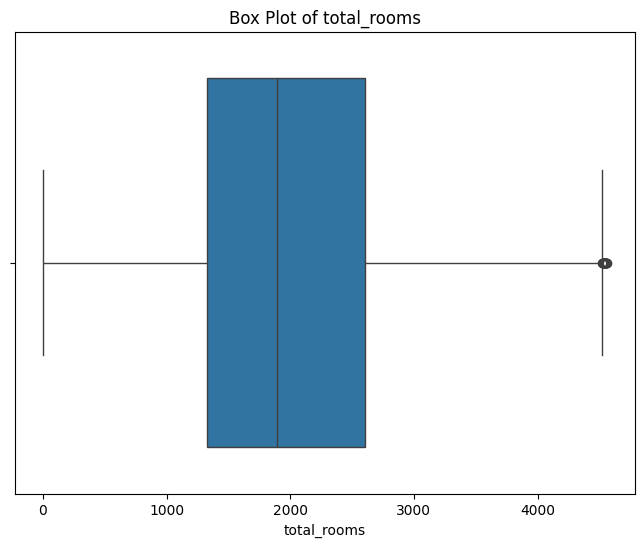

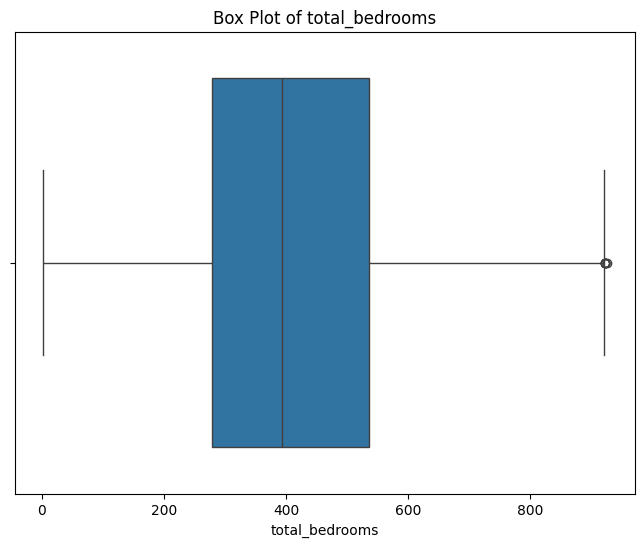

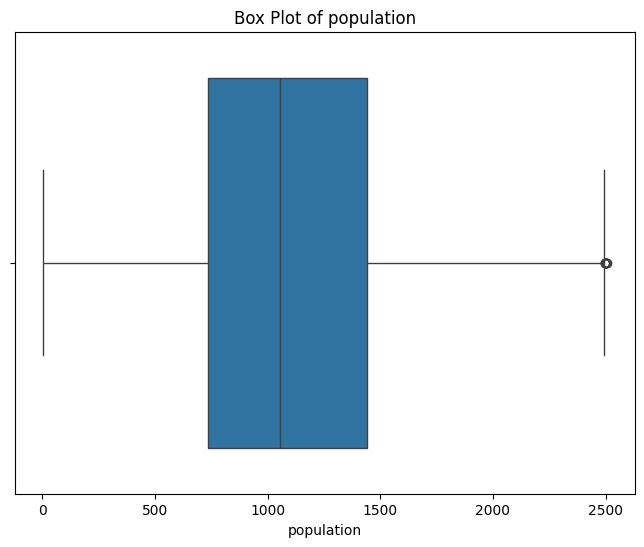

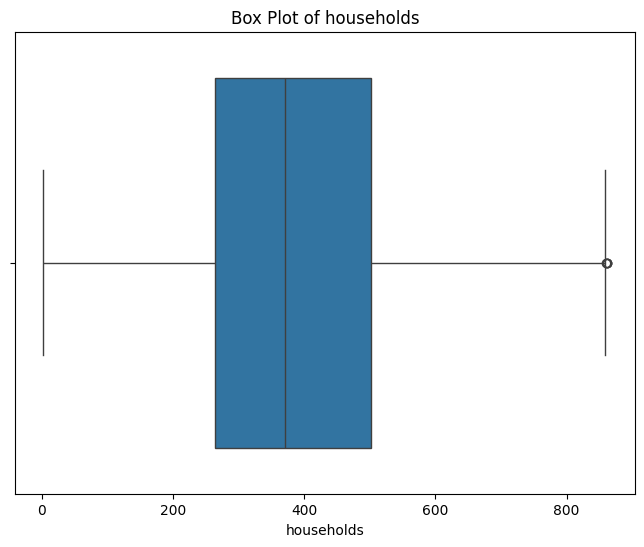

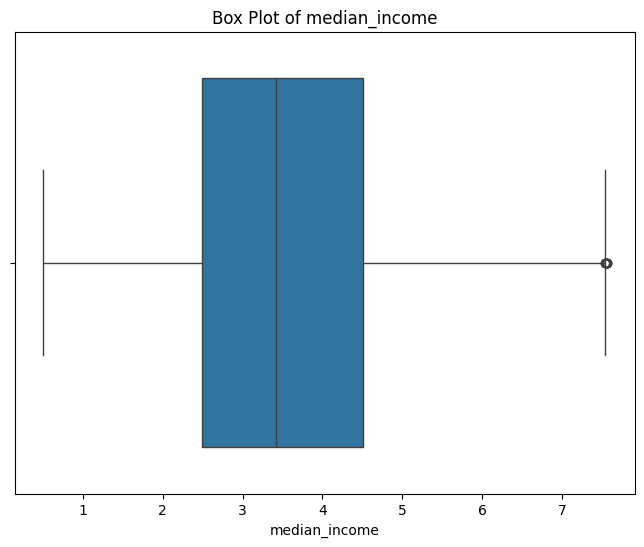

In [107]:
numerical_cols = data.select_dtypes(include=[np.number]).columns
for col in features_to_check:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

In [108]:
data.shape

(16689, 10)

In [109]:
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [111]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [112]:
y_pred = tree_reg.predict(X_test)

In [113]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R² Score: {r2}")

RMSE: 68704.27893737968
MAE: 44139.242360695025
R² Score: 0.5746084766927539


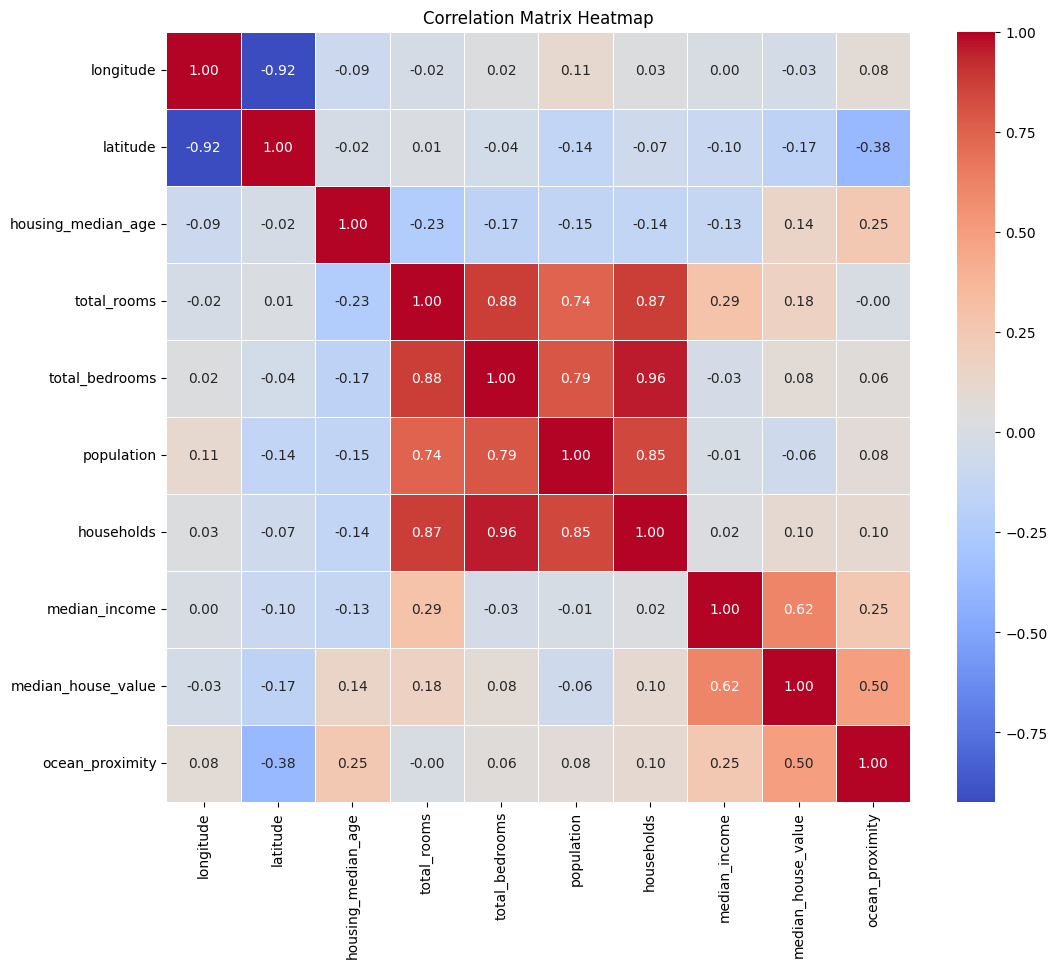

In [114]:
corr_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# Add title and labels
plt.title('Correlation Matrix Heatmap')
plt.show()

In [120]:
data = data.drop('latitude', axis =1)

In [121]:
data.shape

(16689, 9)

In [126]:
print(data['total_bedrooms'].min(), data['total_bedrooms'].max())

2.0 925.0


In [125]:
data.head()

longitude  housing_median_age  total_rooms  total_bedrooms  population  \
2    -122.24                52.0       1467.0           190.0       496.0   
3    -122.25                52.0       1274.0           235.0       558.0   
4    -122.25                52.0       1627.0           280.0       565.0   
5    -122.25                52.0        919.0           213.0       413.0   
6    -122.25                52.0       2535.0           489.0      1094.0   

   households  median_income  median_house_value  ocean_proximity  
2       177.0         7.2574            352100.0              0.5  
3       219.0         5.6431            341300.0              0.5  
4       259.0         3.8462            342200.0              0.5  
5       193.0         4.0368            269700.0              0.5  
6       514.0         3.6591            299200.0              0.5

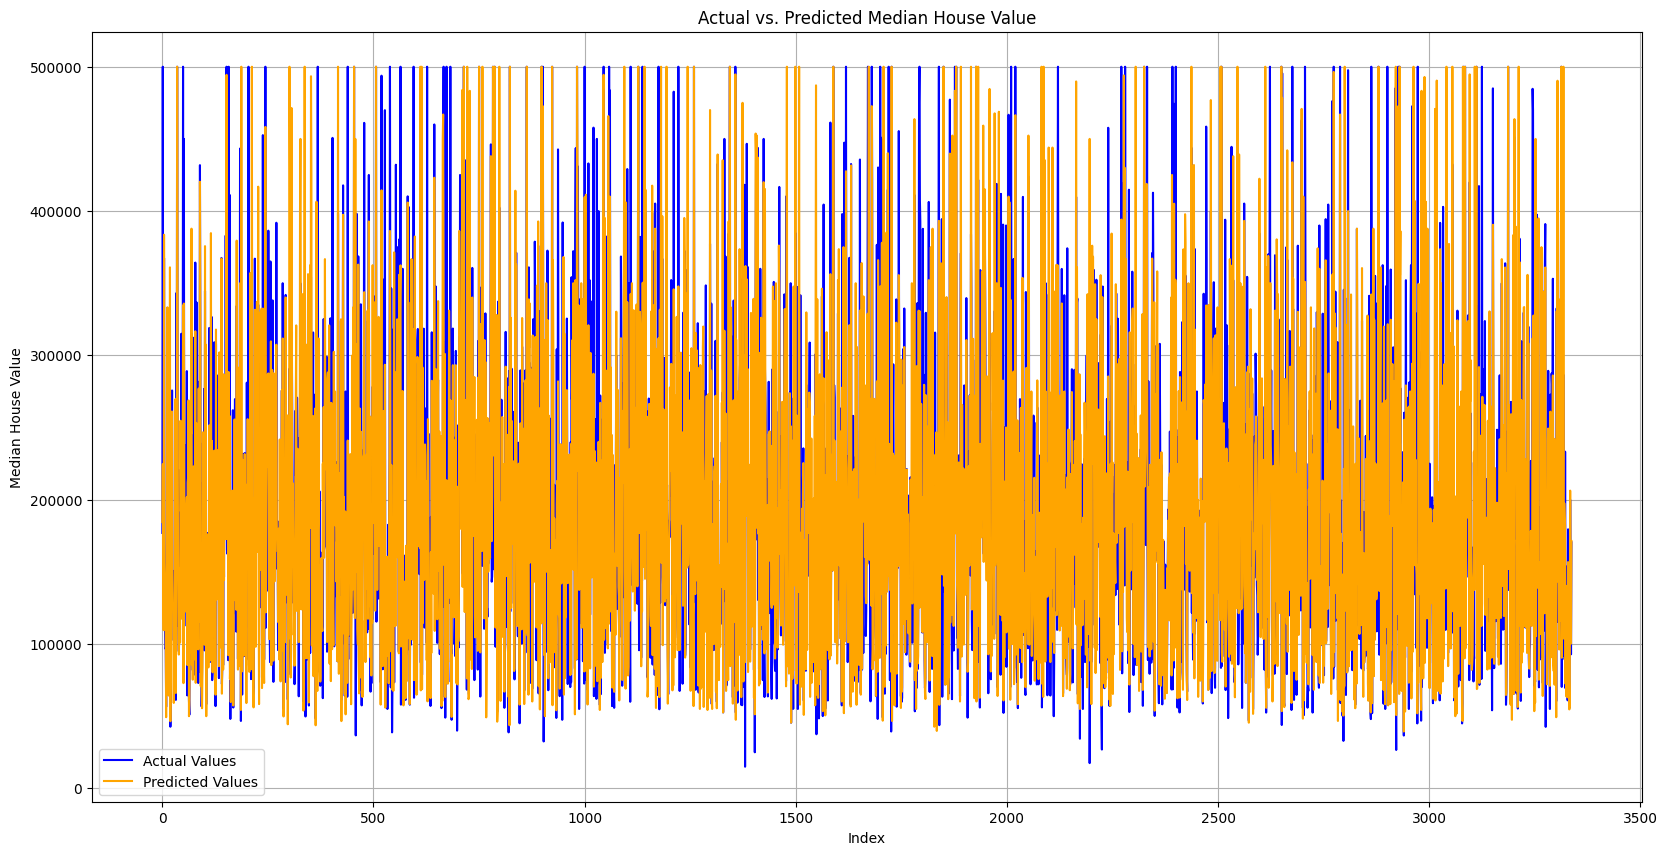

In [136]:
plt.figure(figsize=(20, 10))

# Plot actual values
plt.plot(y_test.values, label='Actual Values', color='blue', linestyle='-')

# Plot predicted values
plt.plot(y_pred, label='Predicted Values', color='orange', linestyle='-')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Median House Value')
plt.title('Actual vs. Predicted Median House Value')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [137]:
data.head(10)

longitude  housing_median_age  total_rooms  total_bedrooms  population  \
2     -122.24                52.0       1467.0           190.0       496.0   
3     -122.25                52.0       1274.0           235.0       558.0   
4     -122.25                52.0       1627.0           280.0       565.0   
5     -122.25                52.0        919.0           213.0       413.0   
6     -122.25                52.0       2535.0           489.0      1094.0   
7     -122.25                52.0       3104.0           687.0      1157.0   
8     -122.26                42.0       2555.0           665.0      1206.0   
9     -122.25                52.0       3549.0           707.0      1551.0   
10    -122.26                52.0       2202.0           434.0       910.0   
11    -122.26                52.0       3503.0           752.0      1504.0   

    households  median_income  median_house_value  ocean_proximity  
2        177.0         7.2574            352100.0              0.5  
3        219.0         5.6431            341300.0              0.5  
4        259.0         3.8462            342200.0              0.5  
5        193.0         4.0368            269700.0              0.5  
6        514.0         3.6591            299200.0              0.5  
7        647.0         3.1200            241400.0              0.5  
8        595.0         2.0804            226700.0              0.5  
9        714.0         3.6912            261100.0              0.5  
10       402.0         3.2031            281500.0              0.5  
11       734.0         3.2705            241800.0              0.5

In [138]:
data['rooms_per_household'] = data['total_rooms'] / data['households']
data['bedrooms_per_room'] = data['total_bedrooms'] / data['total_rooms']
data['population_per_household'] = data['population'] / data['households']

In [139]:
data.columns


Index(['longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity', 'rooms_per_household', 'bedrooms_per_room',
       'population_per_household'],
      dtype='object')

In [140]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[['total_rooms', 'total_bedrooms', 'population', 'median_income','rooms_per_household', 'bedrooms_per_room',
       'population_per_household']] = scaler.fit_transform(
    data[['total_rooms', 'total_bedrooms', 'population', 'median_income','rooms_per_household', 'bedrooms_per_room',
       'population_per_household']]
)

In [142]:
correlation_matrix = data.corr()
print(correlation_matrix['median_house_value'].sort_values(ascending=False))


median_house_value          1.000000
median_income               0.615133
ocean_proximity             0.495760
total_rooms                 0.176881
housing_median_age          0.144109
households                  0.103798
rooms_per_household         0.085048
total_bedrooms              0.082183
longitude                  -0.029284
population                 -0.062771
bedrooms_per_room          -0.170308
population_per_household   -0.221074
Name: median_house_value, dtype: float64


In [143]:
from sklearn.model_selection import train_test_split

X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [145]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [146]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R² Score: {r2}")

RMSE: 68704.27893737968
MAE: 44139.242360695025
R² Score: 0.5746084766927539


In [154]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42, n_estimators=100)
}

# Fit models and store predictions for a specific point (e.g., nth data point)
# n = 10  # Index of the point to predict
predictions = {}
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    predictions[model_name] = {
        'Prediction': y_pred,  # Prediction for the nth point
        'MSE': mse,
        'R2': r2,
        'MAE': mae
    }

# Print the results
print(f"Predictions for all the point:")
for model_name, values in predictions.items():
    print(f"{model_name}: Prediction={values['Prediction'][0]:.2f}, MSE={values['MSE']:.2f}, MAE={values['MAE']:.2f}, R2={values['R2']:.2f}")
print("First 10 Predictions vs. Actual Values:")
for i in range(10):  # Display the first 10 predictions
    print(f"Data Point {i+1}: Predicted = {values['Prediction'][i]:.2f}, Actual = {y_test.values[i]:.2f}")

Predictions for all the point:
Linear Regression: Prediction=209324.89, MSE=4336524548.35, MAE=48036.93, R2=0.61
Decision Tree: Prediction=128700.00, MSE=5931757455.52, MAE=49603.21, R2=0.47
Random Forest: Prediction=175034.00, MSE=2742519610.07, MAE=35440.31, R2=0.75
Gradient Boosting: Prediction=166948.36, MSE=2996469790.90, MAE=38673.38, R2=0.73
First 10 Predictions vs. Actual Values:
Data Point 1: Predicted = 166948.36, Actual = 177000.00
Data Point 2: Predicted = 309605.37, Actual = 500001.00
Data Point 3: Predicted = 259100.58, Actual = 216500.00
Data Point 4: Predicted = 125006.86, Actual = 126400.00
Data Point 5: Predicted = 301077.24, Actual = 367400.00
Data Point 6: Predicted = 198915.12, Actual = 171000.00
Data Point 7: Predicted = 106474.66, Actual = 118800.00
Data Point 8: Predicted = 133206.26, Actual = 96900.00
Data Point 9: Predicted = 138880.90, Actual = 97200.00
Data Point 10: Predicted = 56374.25, Actual = 56500.00


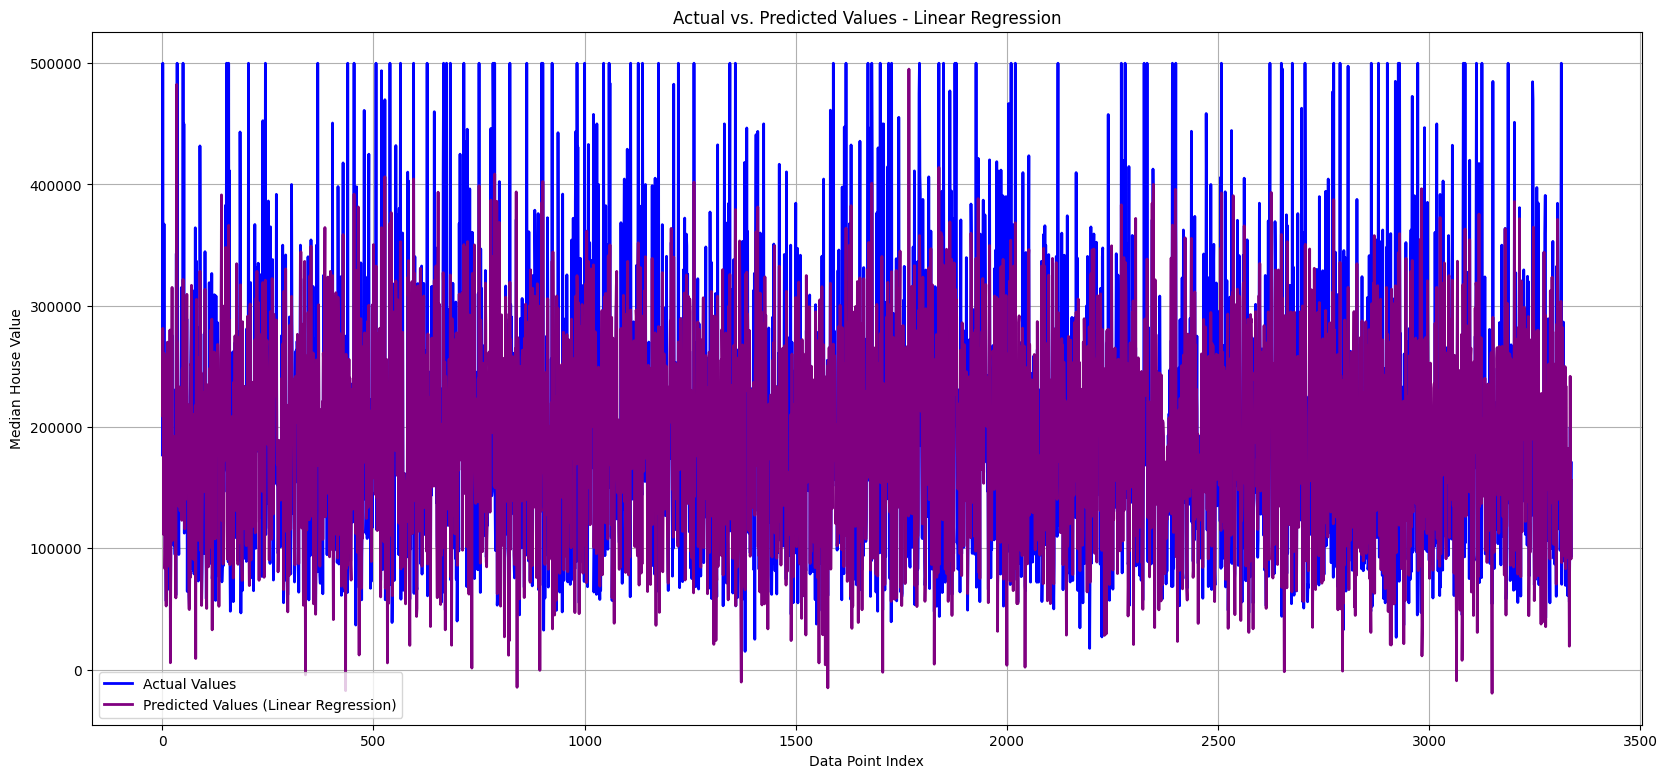

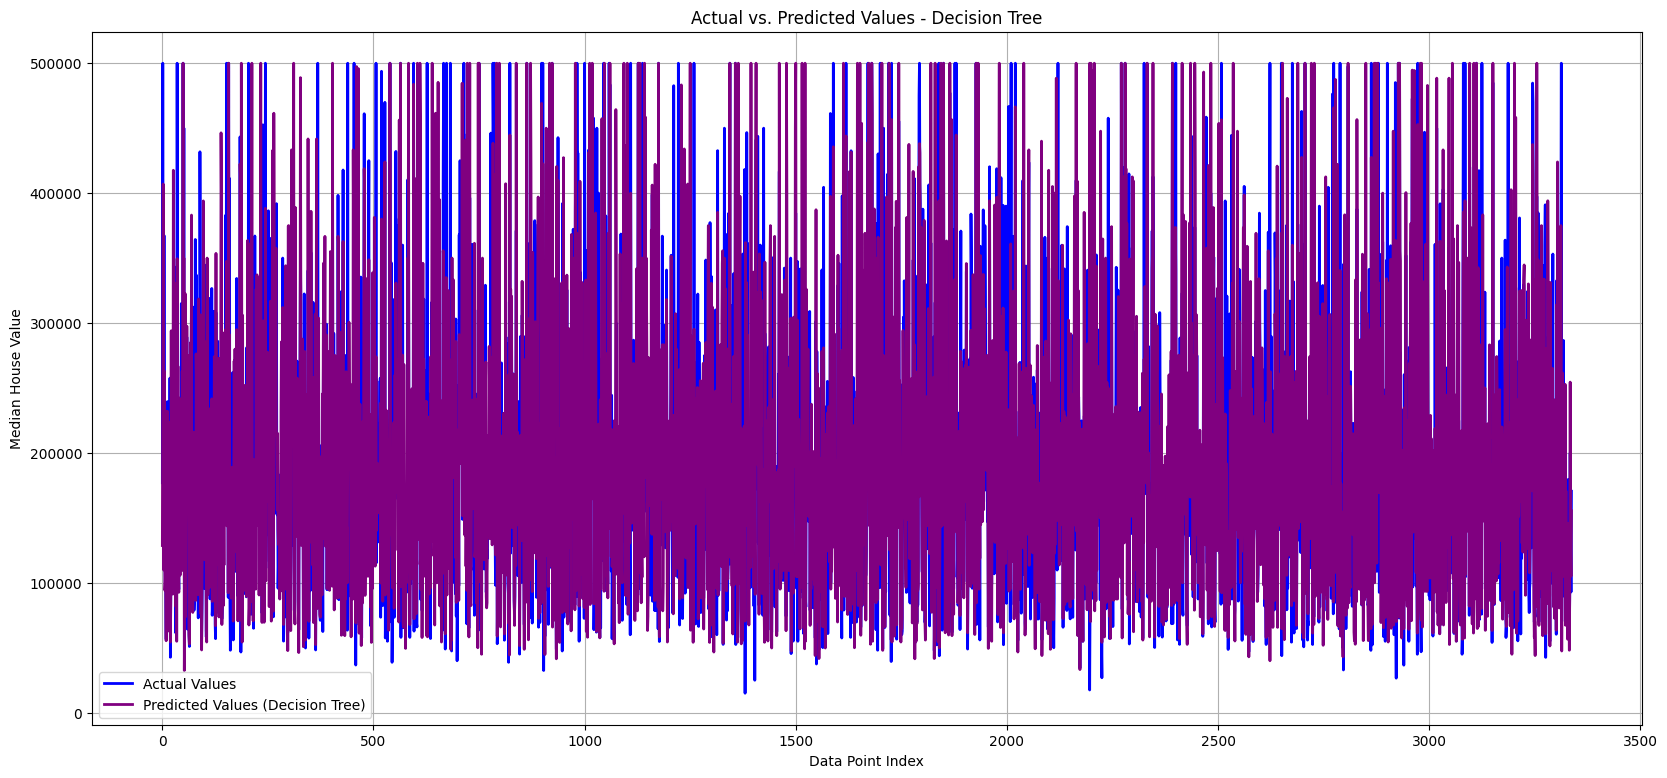

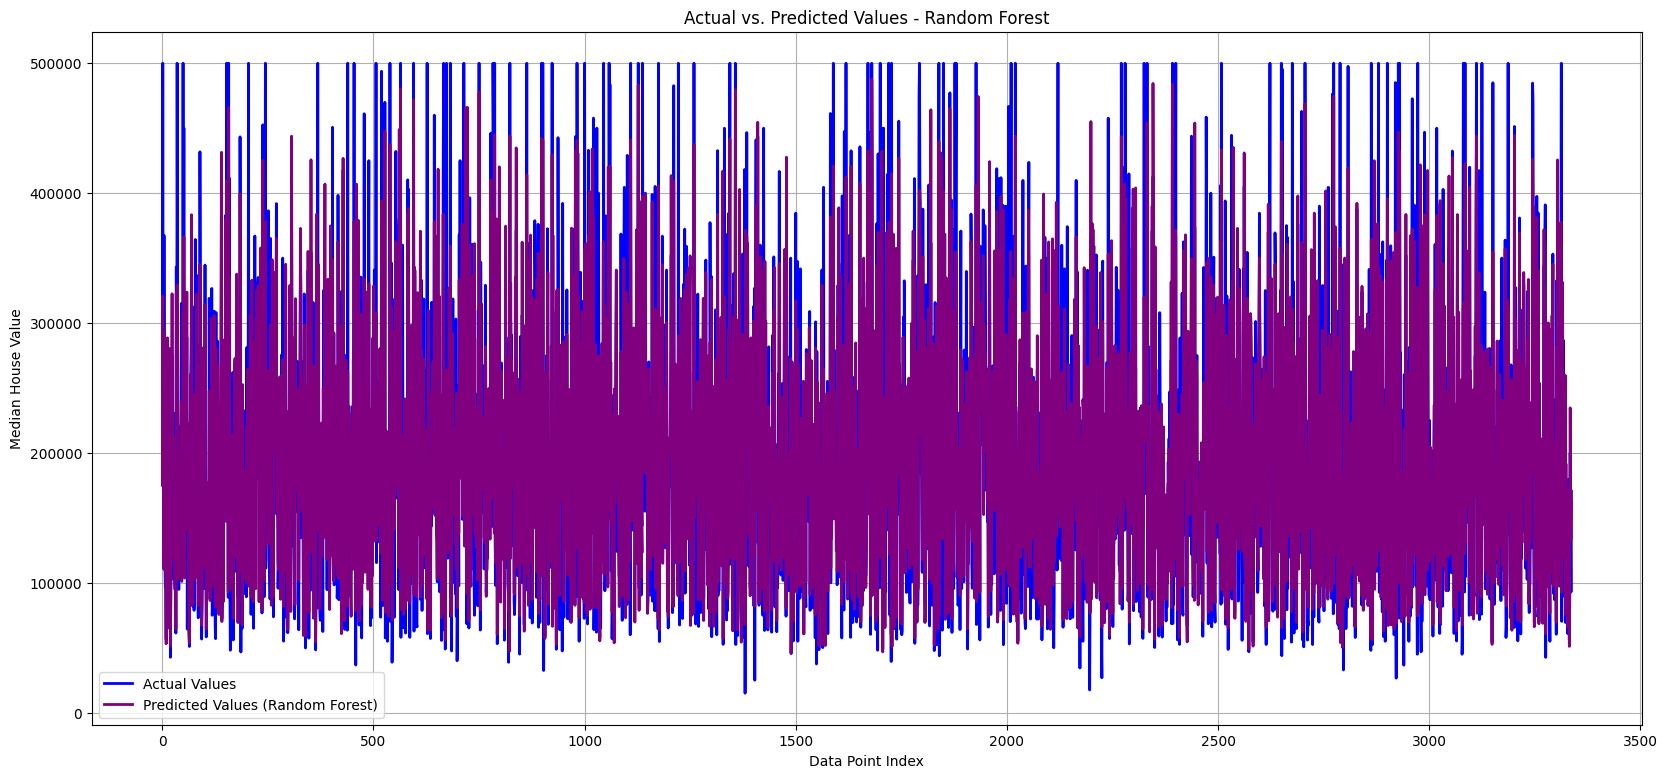

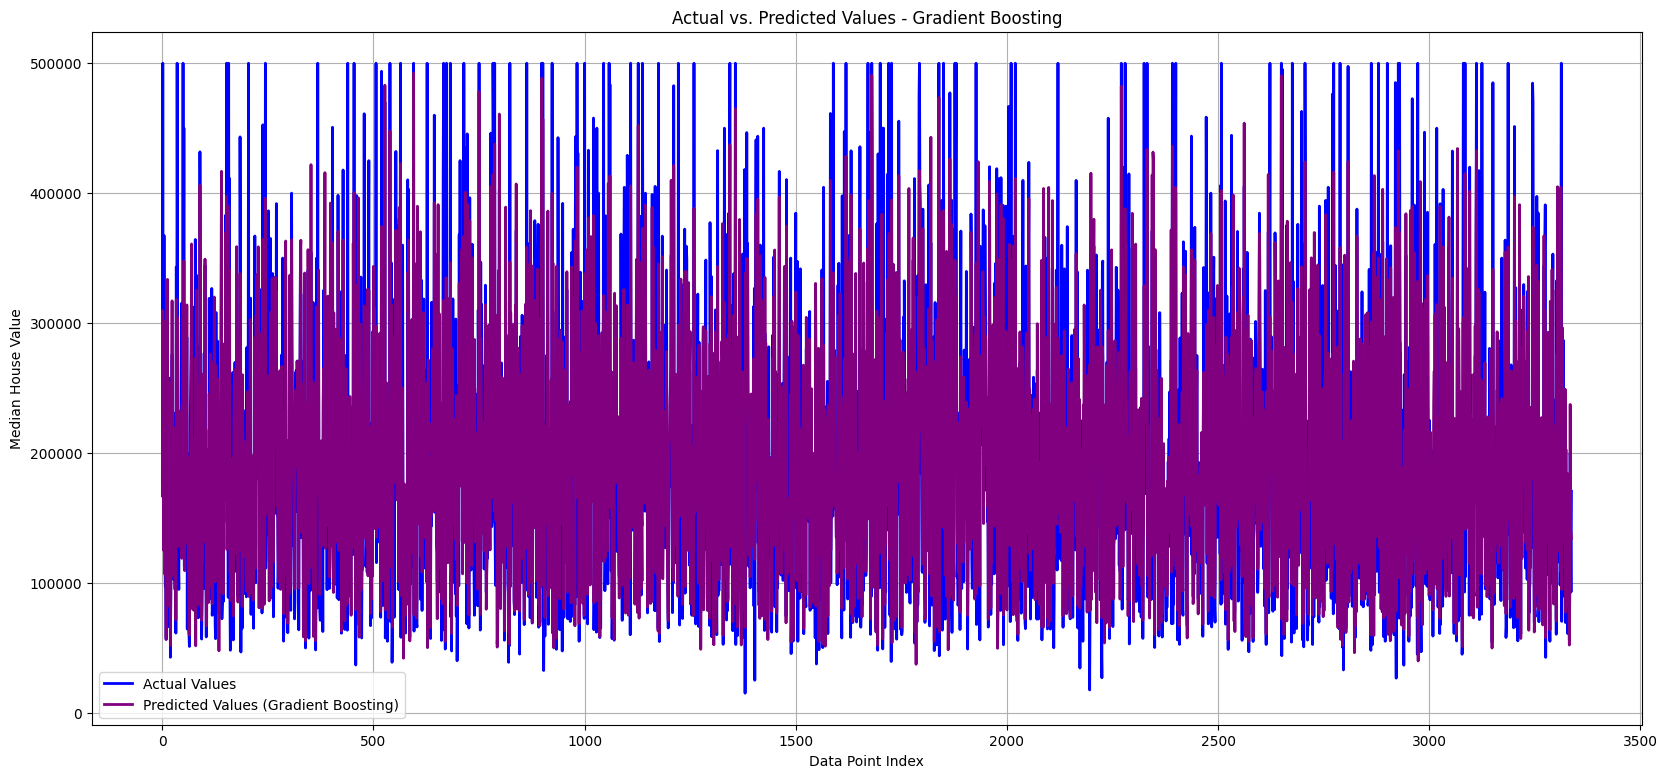

In [159]:
for model_name, values in predictions.items():
    plt.figure(figsize=(20,9))

    # Plot actual values
    plt.plot(y_test.values, label='Actual Values', color='blue', linewidth=2)

    # Plot predicted values
    plt.plot(values['Prediction'], label=f'Predicted Values ({model_name})', color='purple', linestyle='-', linewidth=2)

    # Add labels and title
    plt.xlabel('Data Point Index')
    plt.ylabel('Median House Value')
    plt.title(f'Actual vs. Predicted Values - {model_name}')
    plt.legend()
    plt.grid(True)

    # Show the plot
    plt.show()